In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import xgboost as xgb
from catboost import CatBoostRegressor
import pandas.util.testing as tm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

***
### The Data

In [5]:
data_df = pd.read_csv('/home/rajneesh/Desktop/Queen_City_Hackathon/training.csv', index_col=0)

In [67]:
data_df.head()

,Area_2013,Population_Density_2018,Population _2018,Population_Density_2017,Population _2017,Population_Density_2016,Population _2016,Population_Density_2015,Population _2015,Population_Density_2013,Population _2013,Population_Density_2010,Population_2010,Population_Density_2000,Population _2000,Age_of_Residents_2017,Age_of_Residents_moe_2017,Youth_Population_2017,Youth_Population_moe_2017,Older_Adult_Population_2017,Older_Adult_Population_moe_2017,Vacant_Land_2018,Vacant_Land_Area_2018,Vacant_Land_2017,Vacant_Land_Area_2017,Vacant_Land_2016,Vacant_Land_Area_2016,Vacant_Land_2015,Vacant_Land_Area_2015,Vacant_Land_2013,Vacant_Land_Area_2013,Vacant_Land_2011,Vacant_Land_Area_2011,Household_Income_2017,Household_Income_moe_2017,Public_Nutrition_Assistance_2018,Public_Nutrition_Assistance_2017,Public_Nutrition_Assistance_2016,Public_Nutrition_Assistance_2015,Public_Nutrition_Assistance_2013,Public_Nutrition_Assistance_2011,Employment_Rate_2017,Employment_Rate_moe_2017,Commercial_Construction_2018,Commercial_Construction_Permitted_Units_2018,Commercial_Construction_2017,Commercial_Construction_Permitted_Units_2017,Commercial_Construction_2016,Commercial_Construction_Permitted_Units_2016,Commercial_Construction_2015,Commercial_Construction_Permitted_Units_2015,Commercial_Construction_2014,Commercial_Construction_Permitted_Units_2014,Commercial_Construction_2013,Commercial_Construction_Permitted_Units_2013,Commercial_Construction_2012,Commercial_Construction_Permitted_Units_2012,Commercial_Construction_2011,Commercial_Construction_Permitted_Units_2011,Commercial_Size_2018,Commercial_Size_Total_2018,Commercial_Size_2017,Commercial_Size_Total_2017,Commercial_Size_2016,Commercial_Size_Total_2016,Commercial_Size_2015,Commercial_Size_Total_2015,Commercial_Size_2013,Commercial_Size_Total_2013,Commercial_Size_2011,Commercial_Size_Total_2011,Commercial_Building_Age_2018,Commercial_Building_Age_2017,Commercial_Building_Age_2016,Commercial_Building_Age_2015,Commercial_Building_Age_2013,Commercial_Building_Age_11,Fincancial_Services_Proximity_2018,Financial_Services_Proximate_Units_2018,Fincancial_Services_Proximity_2017,Financial_Services_Proximate_Units_2017,Fincancial_Services_Proximity_2016,Financial_Services_Proximate_Units_2016,Fincancial_Services_Proximity_2015,Financial_Services_Proximate_Units_2015,Fincancial_Services_Proximity_2014,Financial_Services_Proximate_Units_2014,Bachelors_Degree_2017,Bachelors_Degree_moe_2017,High_School_Diploma_2017,High_School_Diploma_moe_2017,Early_Care_Proximity_2017,Early_Care_Proximate_Units_2017,Early_Care_Proximity_2015,Early_Care_Proximate_Units_2015,Early_Care_Proximity_2013,Early_Care_Proximate_Units_2013,Early_Care_Proximity_2011,Early_Care_Proximate_Units_2011,SchoolAge_Proximity_2017,SchoolAge_Proximate_Units_2017,SchoolAge_Proximity_2015,SchoolAge_Proximate_Units_2015,SchoolAge_Proximity_2013,SchoolAge_Proximate_Units_2013,SchoolAge_Proximity_2011,SchoolAge_Proximate_Units_2011,Library_Card_Prevalence_2015,Library_Card_Holders_2015,Library_Card_Prevalence_2013,Library_Card_Holders_2013,Proficiency_Elementary_School_2017,Proficiency_Elementary_School_2016,Proficiency_Elementary_School_2015,Proficiency_Elementary_School_2014,Proficiency_Middle_School_2017,Proficiency_Middle_School_2016,Proficiency_Middle_School_2015,Proficiency_Middle_School_2014,Proficiency_High_School_2017,Proficiency_High_School_2016,Proficiency_High_School_2015,Proficiency_High_School_2014,Highschool_Graduation_Rate_2017,Highschool_Graduation_Rate_2016,Highschool_Graduation_Rate_2015,Highschool_Graduation_Rate_2014,Highschool_Graduation_Rate_2013,Student_Absenteeism_2017,Student_Absenteeism_2016,Student_Absenteeism_2015,Student_Absenteeism_2014,Student_Absenteeism_2013,Neighborhood_School_Attendance_2017,Neighborhood_School_Attendance_2016,Neighborhood_School_Attendance_2015,Neighborhood_School_Attendance_2014,Neighborhood_School_Attendance_2013,Neighborhood_School_Attendance_2011,Arts_Participation_2013,Arts_Participating_Ho

***
### Data Stats

In [68]:
data_df.describe()

,Area_2013,Population_Density_2018,Population _2018,Population_Density_2017,Population _2017,Population_Density_2016,Population _2016,Population_Density_2015,Population _2015,Population_Density_2013,Population _2013,Population_Density_2010,Population_2010,Population_Density_2000,Population _2000,Age_of_Residents_2017,Age_of_Residents_moe_2017,Youth_Population_2017,Youth_Population_moe_2017,Older_Adult_Population_2017,Older_Adult_Population_moe_2017,Vacant_Land_2018,Vacant_Land_Area_2018,Vacant_Land_2017,Vacant_Land_Area_2017,Vacant_Land_2016,Vacant_Land_Area_2016,Vacant_Land_2015,Vacant_Land_Area_2015,Vacant_Land_2013,Vacant_Land_Area_2013,Vacant_Land_2011,Vacant_Land_Area_2011,Household_Income_2017,Household_Income_moe_2017,Public_Nutrition_Assistance_2018,Public_Nutrition_Assistance_2017,Public_Nutrition_Assistance_2016,Public_Nutrition_Assistance_2015,Public_Nutrition_Assistance_2013,Public_Nutrition_Assistance_2011,Employment_Rate_2017,Employment_Rate_moe_2017,Commercial_Construction_2018,Commercial_Construction_Permitted_Units_2018,Commercial_Construction_2017,Commercial_Construction_Permitted_Units_2017,Commercial_Construction_2016,Commercial_Construction_Permitted_Units_2016,Commercial_Construction_2015,Commercial_Construction_Permitted_Units_2015,Commercial_Construction_2014,Commercial_Construction_Permitted_Units_2014,Commercial_Construction_2013,Commercial_Construction_Permitted_Units_2013,Commercial_Construction_2012,Commercial_Construction_Permitted_Units_2012,Commercial_Construction_2011,Commercial_Construction_Permitted_Units_2011,Commercial_Size_2018,Commercial_Size_Total_2018,Commercial_Size_2017,Commercial_Size_Total_2017,Commercial_Size_2016,Commercial_Size_Total_2016,Commercial_Size_2015,Commercial_Size_Total_2015,Commercial_Size_2013,Commercial_Size_Total_2013,Commercial_Size_2011,Commercial_Size_Total_2011,Commercial_Building_Age_2018,Commercial_Building_Age_2017,Commercial_Building_Age_2016,Commercial_Building_Age_2015,Commercial_Building_Age_2013,Commercial_Building_Age_11,Fincancial_Services_Proximity_2018,Financial_Services_Proximate_Units_2018,Fincancial_Services_Proximity_2017,Financial_Services_Proximate_Units_2017,Fincancial_Services_Proximity_2016,Financial_Services_Proximate_Units_2016,Fincancial_Services_Proximity_2015,Financial_Services_Proximate_Units_2015,Fincancial_Services_Proximity_2014,Financial_Services_Proximate_Units_2014,Bachelors_Degree_2017,Bachelors_Degree_moe_2017,High_School_Diploma_2017,High_School_Diploma_moe_2017,Early_Care_Proximity_2017,Early_Care_Proximate_Units_2017,Early_Care_Proximity_2015,Early_Care_Proximate_Units_2015,Early_Care_Proximity_2013,Early_Care_Proximate_Units_2013,Early_Care_Proximity_2011,Early_Care_Proximate_Units_2011,SchoolAge_Proximity_2017,SchoolAge_Proximate_Units_2017,SchoolAge_Proximity_2015,SchoolAge_Proximate_Units_2015,SchoolAge_Proximity_2013,SchoolAge_Proximate_Units_2013,SchoolAge_Proximity_2011,SchoolAge_Proximate_Units_2011,Library_Card_Prevalence_2015,Library_Card_Holders_2015,Library_Card_Prevalence_2013,Library_Card_Holders_2013,Proficiency_Elementary_School_2017,Proficiency_Elementary_School_2016,Proficiency_Elementary_School_2015,Proficiency_Elementary_School_2014,Proficiency_Middle_School_2017,Proficiency_Middle_School_2016,Proficiency_Middle_School_2015,Proficiency_Middle_School_2014,Proficiency_High_School_2017,Proficiency_High_School_2016,Proficiency_High_School_2015,Proficiency_High_School_2014,Highschool_Graduation_Rate_2017,Highschool_Graduation_Rate_2016,Highschool_Graduation_Rate_2015,Highschool_Graduation_Rate_2014,Highschool_Graduation_Rate_2013,Student_Absenteeism_2017,Student_Absenteeism_2016,Student_Absenteeism_2015,Student_Absenteeism_2014,Student_Absenteeism_2013,Neighborhood_School_Attendance_2017,Neighborhood_School_Attendance_2016,Neighborhood_School_Attendance_2015,Neighborhood_School_Attendance_2014,Neighborhood_School_Attendance_2013,Neighborhood_School_Attendance_2011,Arts_Participation_2013,Arts_Participating_Ho

***
### Correlation Heatmap

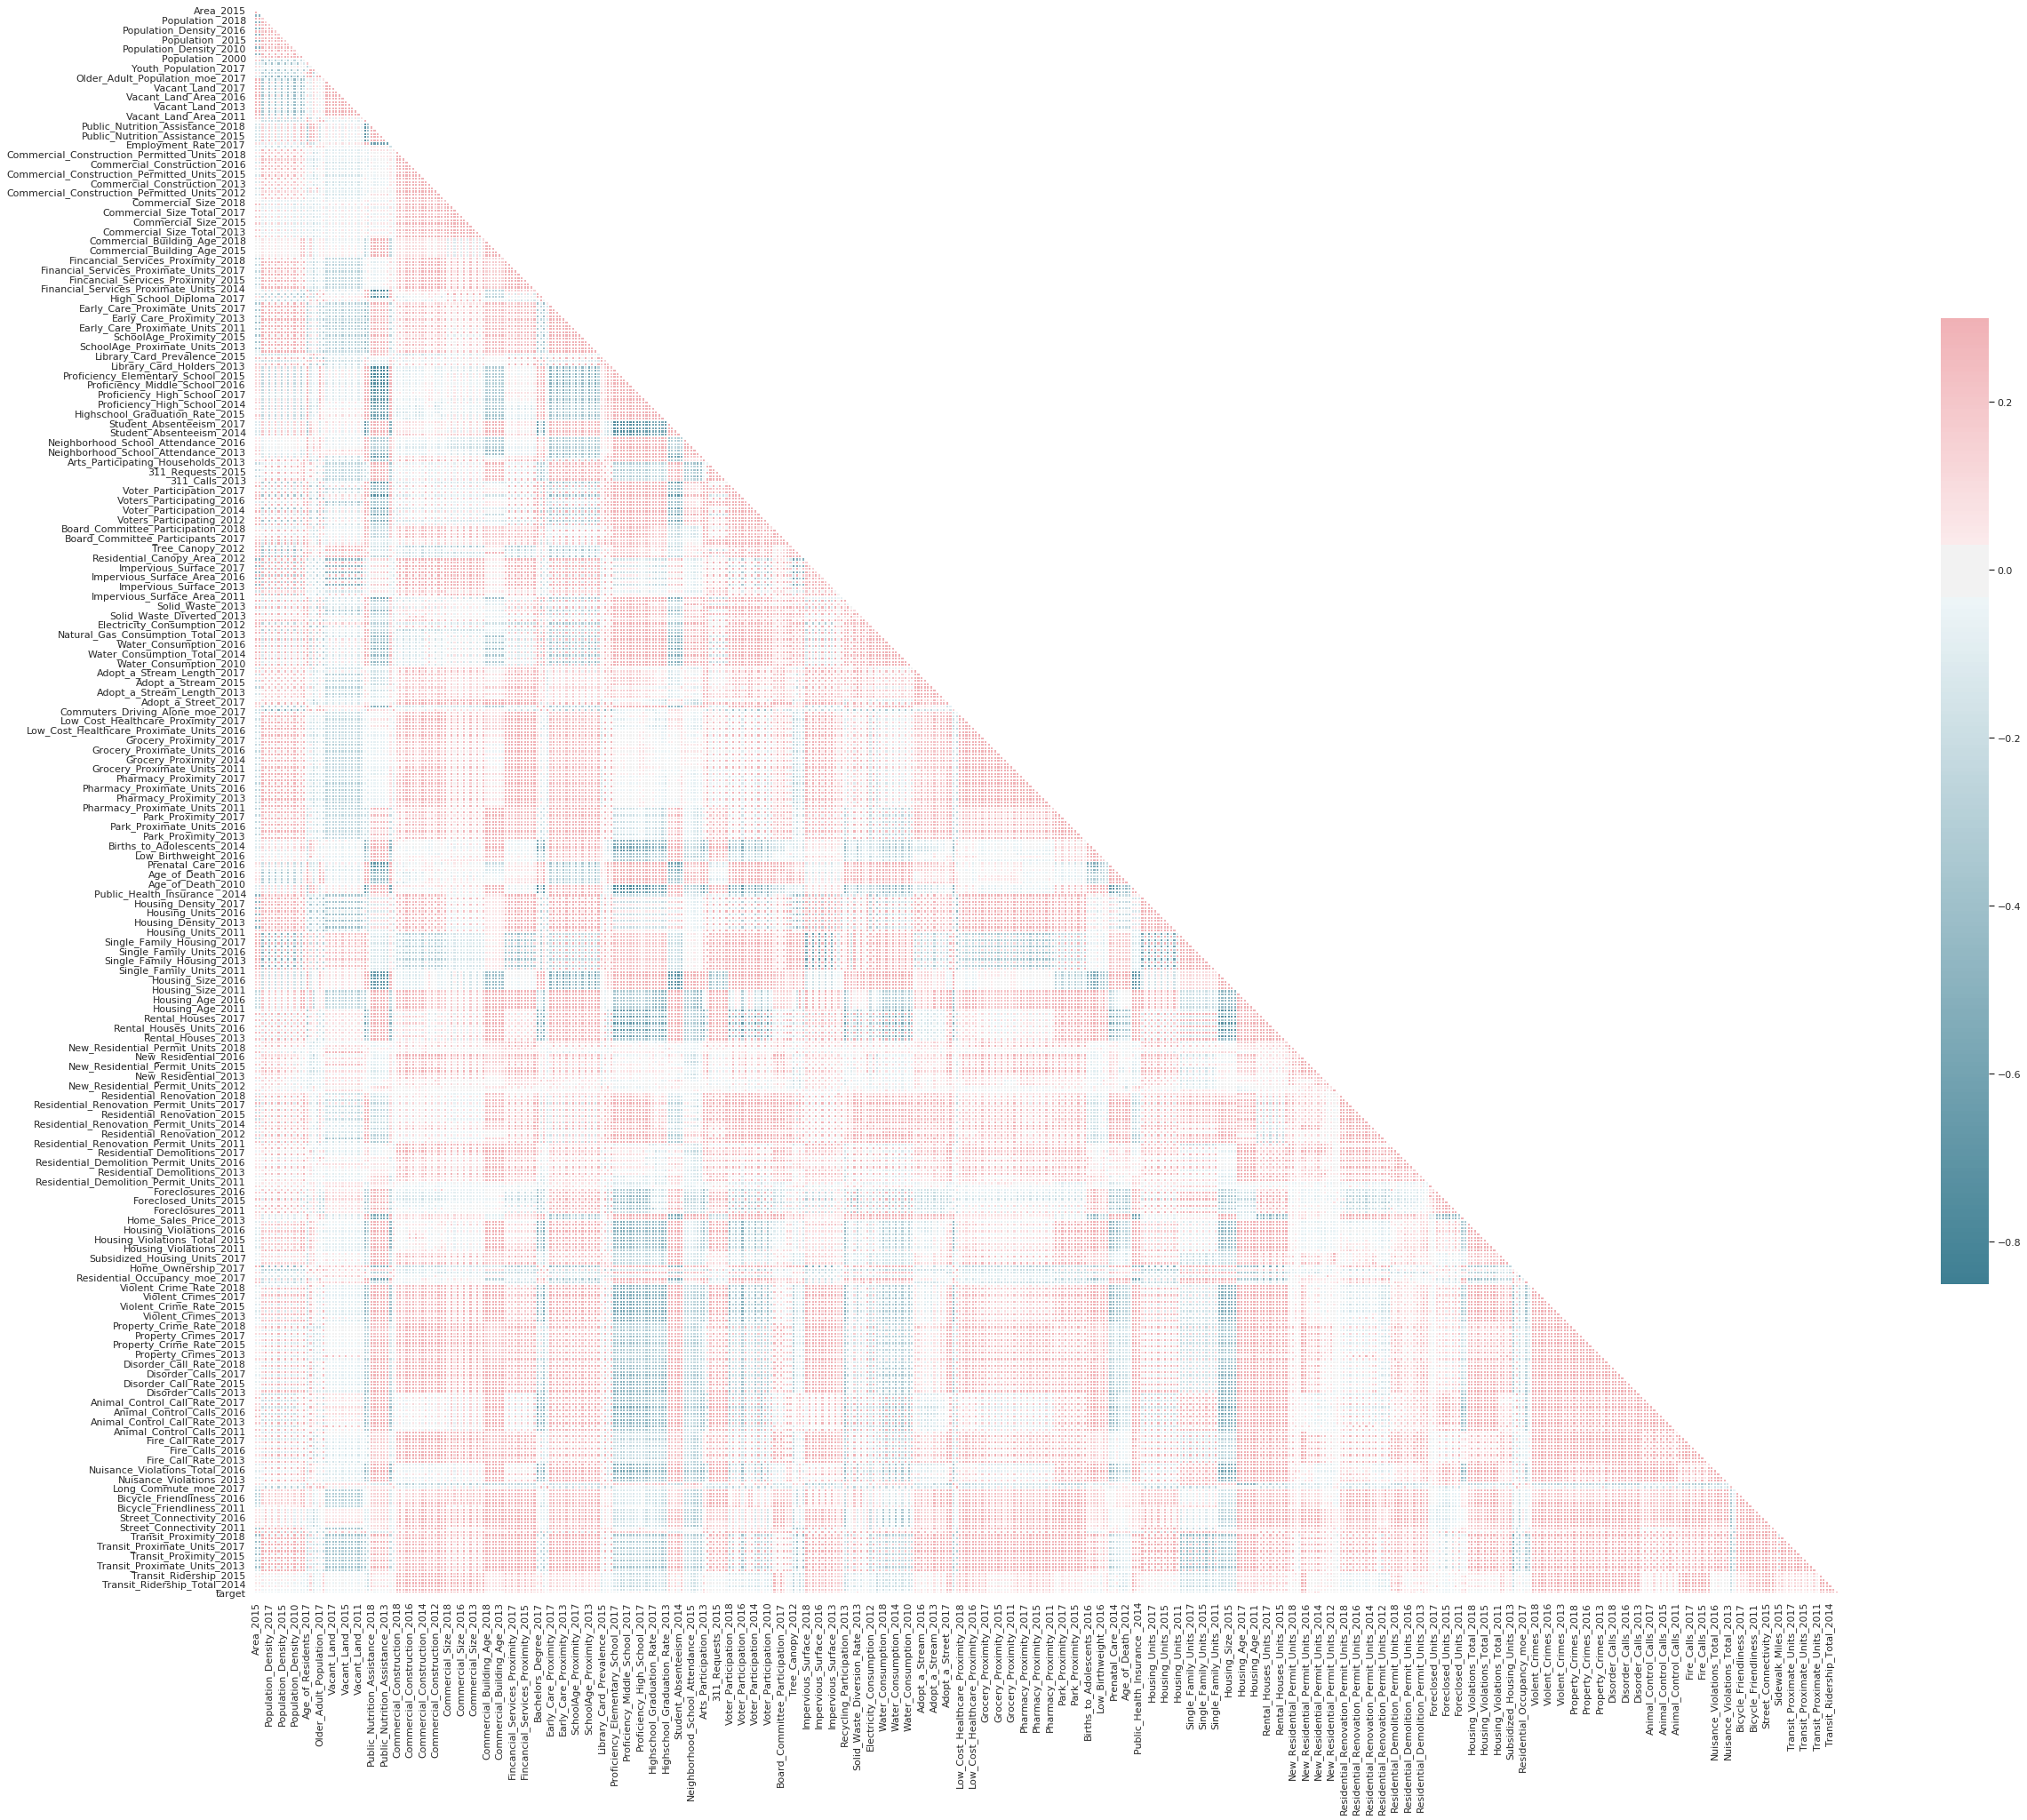

In [20]:
from string import ascii_letters

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = data_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
# Create correlation matrix
corr_matrix = data_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]

***
### Drop co related columns

In [7]:
data_nodups_df = data_df.drop(columns=to_drop)

In [94]:
data_nodups_df.shape

(416, 264)

***
### Data Preparation

In [10]:
data_nonull_df = data_nodups_df.fillna(data_nodups_df.mean())
y = data_nonull_df['target']
X = data_nonull_df.drop(columns=['target'])

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30)

***
### XGBoost

In [112]:
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

/home/rajneesh/miniconda3/envs/py36/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [97]:
#params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}

#baset_params = {'subsample': 0.95, 'reg_lambda': 1e-05, 'reg_alpha': 0.75, 'n_estimators': 200, 'min_child_weight': 1.5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
#cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, num_boost_round=1000, early_stopping_rounds=10, metrics="mse", as_pandas=True, seed=123)
best_params = {"objective":"reg:squarederror", 'subsample': 0.95, 'reg_lambda': 1e-05, 'reg_alpha': 1e-05, 'n_estimators': 300, 'min_child_weight': 1.5, 'max_depth': 7, 'learning_rate': 0.07, 'gamma': 0.03, 'colsample_bytree': 0.4}


In [113]:
xg_reg = xgb.train(params=baset_params, dtrain=train_dmatrix, num_boost_round=1000)

In [114]:
y_pred = xg_reg.predict(xgb.DMatrix(data=X_test))

In [115]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 0.14
RMSE: 0.38


***

In [121]:
xg_reg = xgb.train(params=baset_params, dtrain=xgb.DMatrix(data=X, label=y), num_boost_round=1000)

/home/rajneesh/miniconda3/envs/py36/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/rajneesh/miniconda3/envs/py36/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


***
#### Grid Search CV

In [59]:
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0, 0.03, 0.1, 0.3],
    'min_child_weight':[1.5, 4, 6, 8, 10],
    'learning_rate':[0.1, 0.3, 0.07],
    'max_depth':[3, 5, 7],
    'n_estimators':[100, 200, 300, 500],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=100, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)
gsearch1 = RandomizedSearchCV(estimator = xgb_model, param_distributions= parameters_for_testing, n_jobs=-1, iid=False, verbose=10, scoring='neg_mean_squared_error', cv)
gsearch1.fit(X_train, y_train)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/rajneesh/miniconda3/envs/py36/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:   22.1s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   23.3s remaining:    7.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   25.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.0s finished
/home/rajneesh/miniconda3/envs/py36/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None a

[23:42:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params
{'subsample': 0.95, 'reg_lambda': 1e-05, 'reg_alpha': 1e-05, 'n_estimators': 300, 'min_child_weight': 1.5, 'max_depth': 7, 'learning_rate': 0.07, 'gamma': 0.03, 'colsample_bytree': 0.4}
best score
-0.5966656726267199


In [107]:
test_df = pd.read_csv('/home/rajneesh/Desktop/Queen_City_Hackathon/testing.csv', index_col=0)

In [108]:
test_nodups_df = test_df.drop(columns=to_drop)
test_nodups_df = test_nodups_df.fillna(data_nodups_df.mean())

In [109]:
print(test_nodups_df.shape)
print(data_nonull_df.shape)
print(X.shape)

(45, 263)
(416, 264)
(416, 263)


In [117]:
predictions = xg_reg.predict(xgb.DMatrix(data=test_nodups_df))

In [119]:
pd.DataFrame(predictions).to_csv('predictions.csv', index = False)

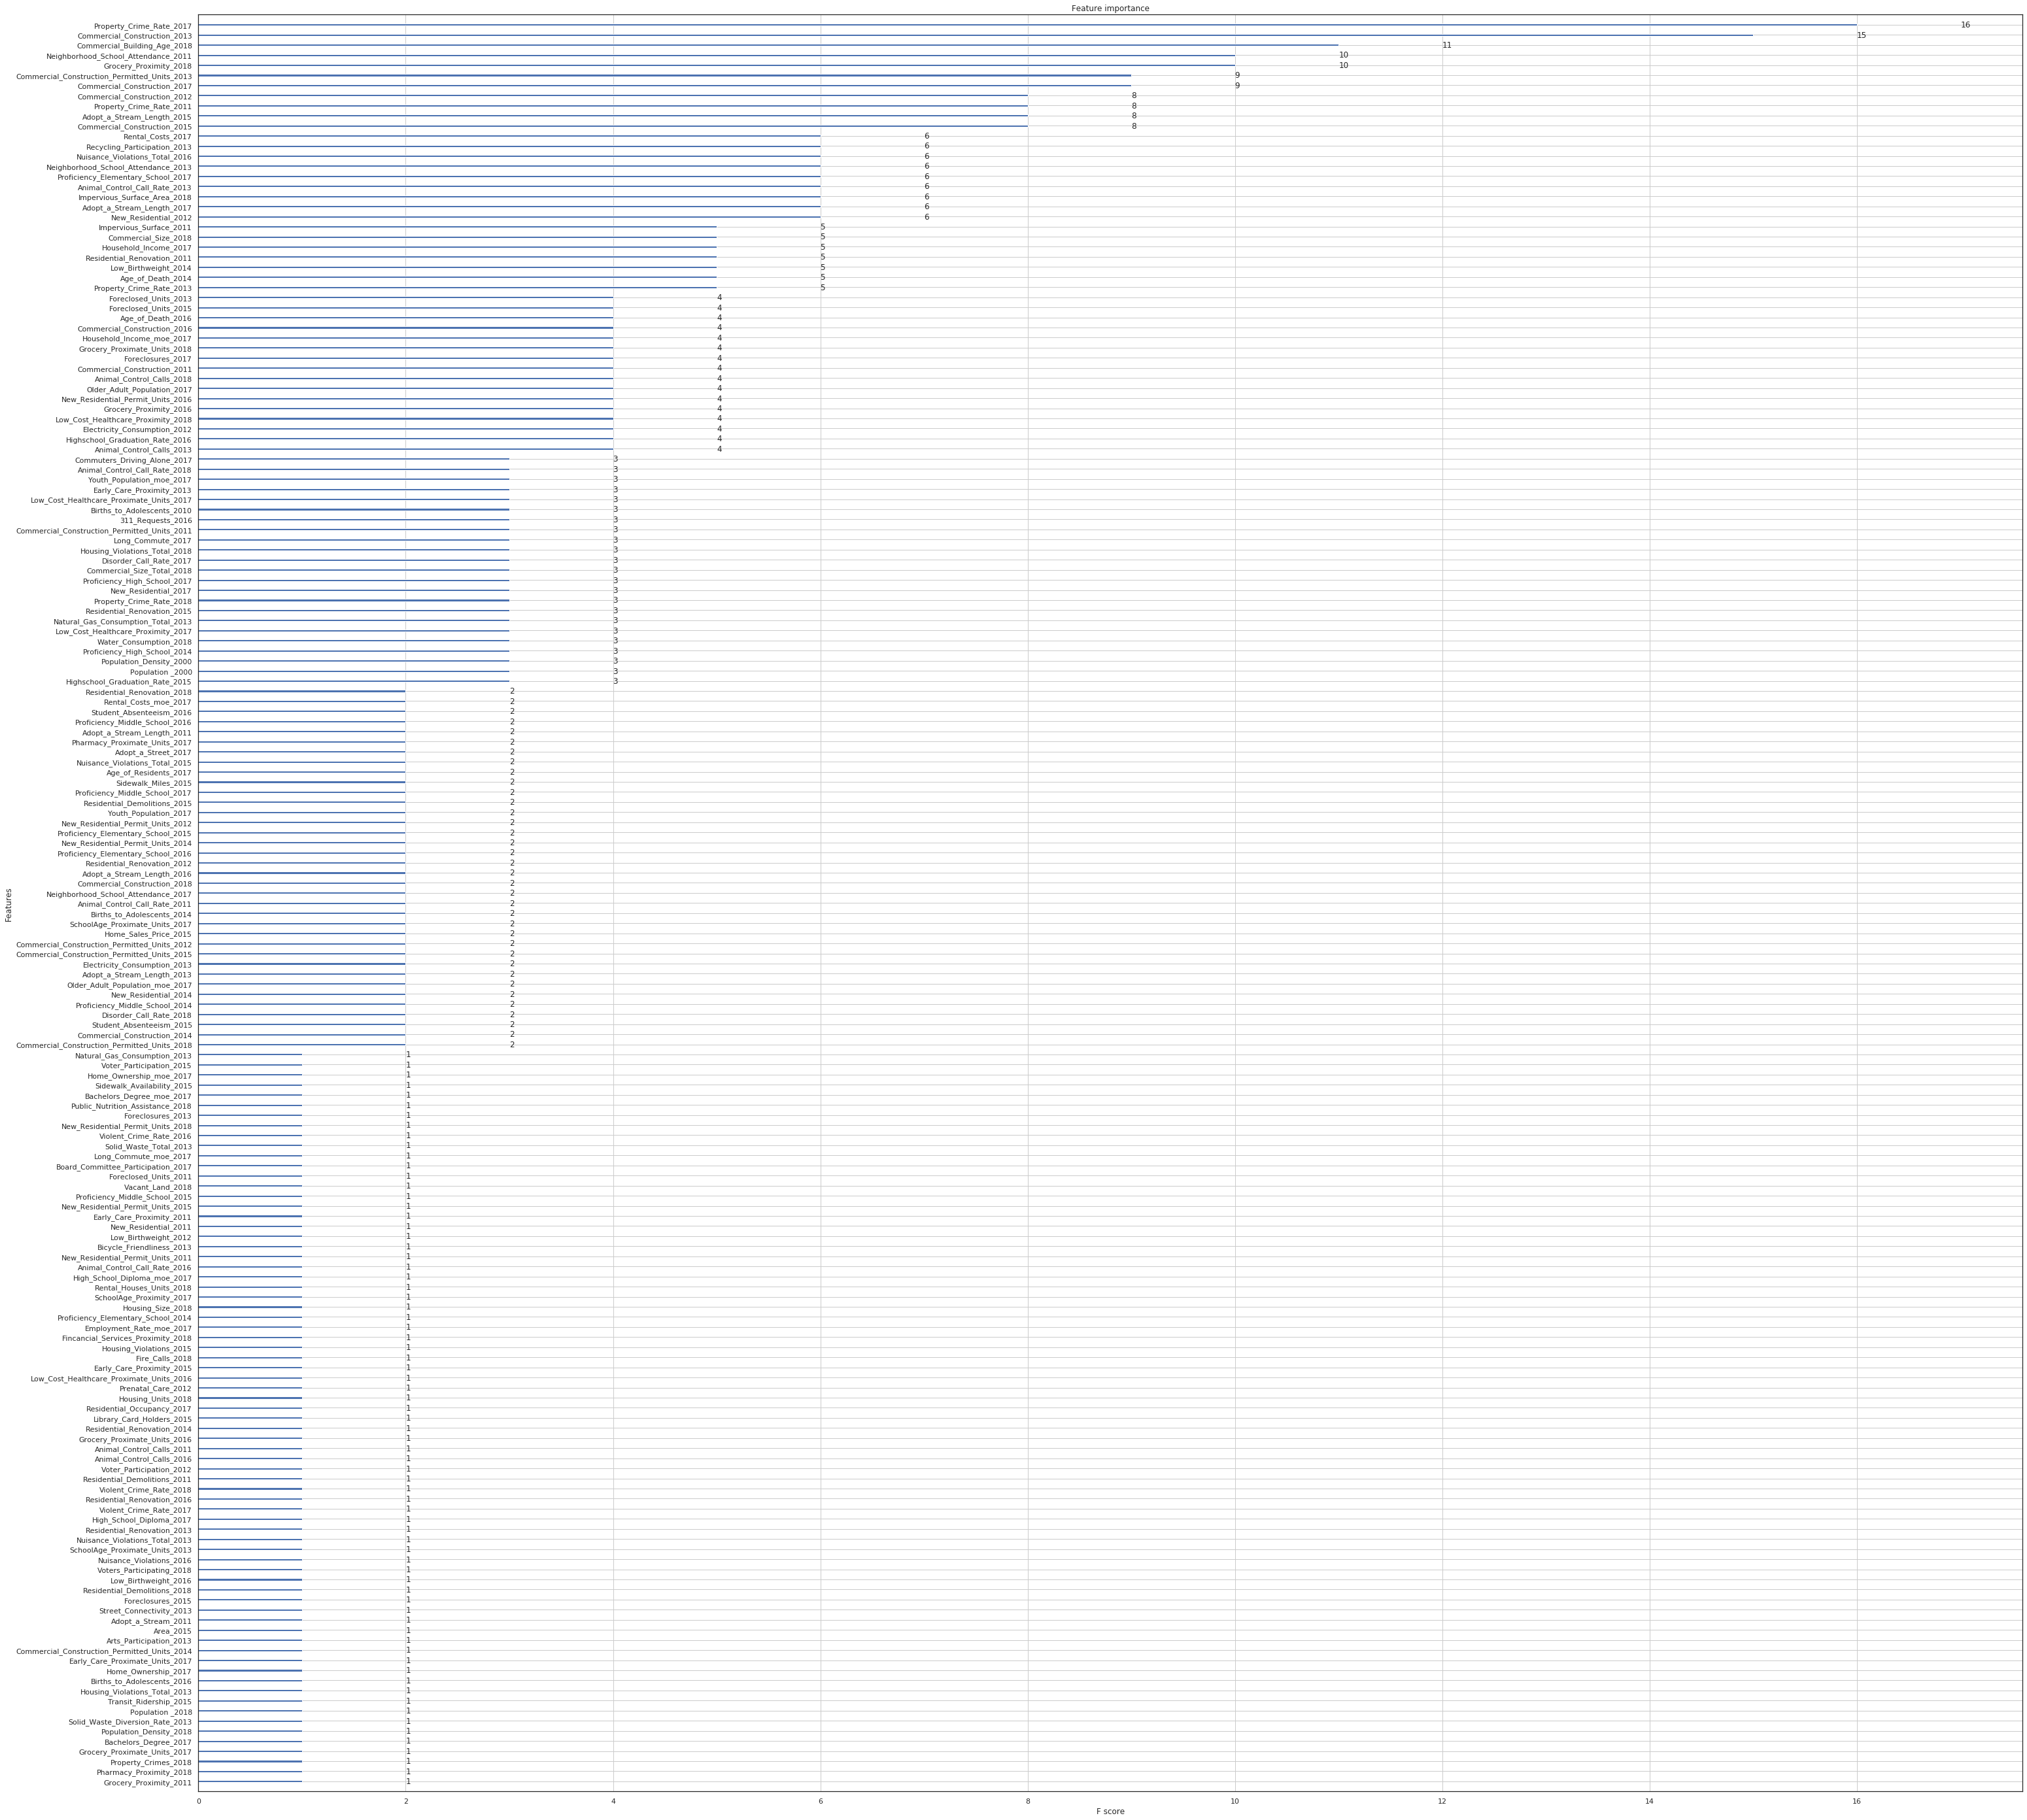

In [87]:
plt.rcParams['figure.figsize'] = [50, 50]
xgb.plot_importance(xg_reg)
plt.show()

***
### Lasso Model